Lab 18

Rex McArthur



In [2]:
from __future__ import division
import numpy as np
from scipy.integrate import quad
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
from scipy.interpolate import barycentric_interpolate

Problem 1 and 2

In [3]:
def c_func(x):
    return -7/10 *(x**2-1)

def alpha(x):
    return (1-c_func(x)**2)**(-.5)

def L(x, y, y_prime):
    return alpha(x)*(1+(alpha(x)*y_prime(x))**2)**.5 - alpha(x)**2*c_func(x)*y_prime(x)

def T(L,a,b,args):
    '''
    args should take (x,y,y_prime)
    '''
    return quad(L,a,b,args)
    

x = np.linspace(-1,1,20)
y = lambda x: 5/2*x + 5/2
y_prime = lambda x: 5/2
print(T(L,-1,1,(y,y_prime)))

#Lower bound is 2

(3.8770820491384126, 3.00494543042e-09)


Problem 3

In [4]:
def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    dX = X - X.T
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

In [9]:
D,x = cheb(20)
a = alpha(x)
c = c_func(x)

def F(y):
    yp = D.dot(y)
    out = D.dot(a**3 * yp * (1+(a*yp)**2)**-.5 - a**2*c)

    #Make sure to set the boundaries correctly

    out[0] = y[0] -5
    out[-1] = y[-1]
    return out #Newtons Method will update U until the output is all 0s.

guess = np.ones(21) #Make your guess, same size as the cheb(N) output
solution = fsolve(F, guess)
est = barycentric_interpolate(x,solution,np.linspace(-1,1,101))
plt.plot(np.linspace(0,1,101),est)
plt.legend(loc='best')
plt.show()

Problem 4

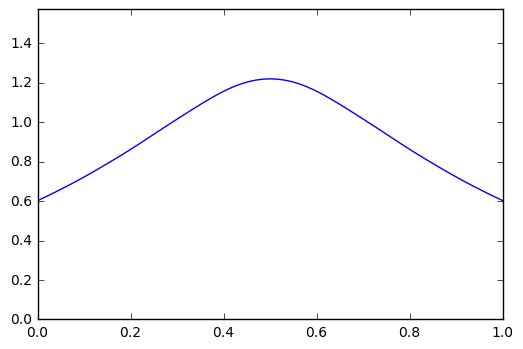

In [12]:
def func_min(x):
    return c/np.cos(x) +np.tan(x) - D.dot(solution)

x0 = np.ones_like(solution)
vals = fsolve(func_min, x0)
est = barycentric_interpolate(x,vals,np.linspace(-1,1,101))
plt.plot(np.linspace(0,1,101),est)
plt.legend(loc='best')
plt.ylim(0,np.pi/2)
plt.show()